# 🧩 3.1 – Funciones Avanzadas y Ámbito de Variables

Las **funciones** son la base de la modularidad en Python. Este notebook profundiza en cómo definirlas, pasar argumentos y comprender su ámbito (scope) para evitar errores comunes.

---
## 🎯 Objetivos
- Entender cómo Python maneja el **ámbito de variables** (local, global, anidado).
- Definir funciones con valores por defecto y retornos múltiples.
- Usar *args y **kwargs para manejar argumentos variables.
- Aplicar buenas prácticas de diseño de funciones reutilizables.

In [1]:
print('✅ Módulo 3 – Funciones avanzadas cargado correctamente.')

✅ Módulo 3 – Funciones avanzadas cargado correctamente.


---
## 1️⃣ Definición de funciones y retorno múltiple

En Python, una función puede devolver **uno o varios valores** separados por comas. Estos valores se empaquetan en una tupla.

In [1]:

def estadisticas(lista):
    total = sum(lista)
    media = total / len(lista)
    minimo = min(lista)
    maximo = max(lista)
    return total, media, minimo, maximo



datos = [5, 8, 3, 10]
resultado = estadisticas(datos)
print(resultado)


(26, 6.5, 3, 10)


✅ Al devolver varios valores, puedes **desempaquetarlos** fácilmente:
```python
total, media, minimo, maximo = estadisticas(datos)
```

---
## 2️⃣ Ámbito de variables (scope)

Python busca las variables siguiendo el orden **LEGB**:
- **L**ocal → dentro de la función actual. Se define dentro de la función y solo existe dentro de ella. Se crea       cuando la función se ejecuta y se elimina al terminar la función.
- **E**nclosing → funciones anidadas. Variables de funciones externas, en funciones anidadas. Es local a exterior, pero accesible desde interior.

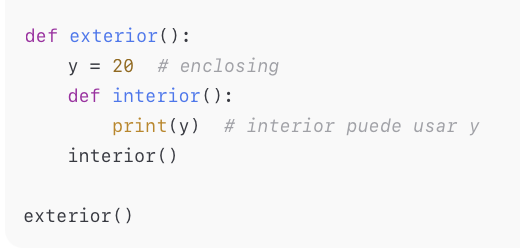


- **G**lobal → variables del módulo. Variables definidas fuera de cualquier función, en el cuerpo principal del módulo. Accesible desde cualquier función, pero no se puede modificar dentro de una función sin usar `global`.
- **B**uilt-in → funciones nativas de Python, las trae por defecto. Están disponibles en todo el programa. Ej: len, print, range, Exception...

### 🧩 Ejercicio 1 – Comprueba el ámbito de una variable
Crea una variable global llamada `contador = 0` y una función que la incremente **sin declararla global**.

¿Qué ocurre al ejecutarla? ¿Por qué?

In [4]:
# 💡 Pista: prueba a modificar contador dentro de la función
# Escribe tu código aquí...
contador = 0

def incrementar(contador): 
    contador += 1
    print('Contador dentro', contador)
    return contador

contador = incrementar(contador)
print('Contador fuera:', contador) # Se actualiza la variable global "contador" porque hemos utilizado "return"

Contador dentro 1
Contador fuera: 1


### ✅ Solución propuesta

In [5]:
contador = 0

def incrementar():
    global contador
    contador += 1
    print('Contador dentro:', contador)

incrementar()
print('Contador fuera:', contador) # Aquí se actualiza porque hemos utilizado "global"

Contador dentro: 1
Contador fuera: 1


✅ Usar `global` permite modificar variables definidas fuera de la función (aunque se recomienda evitarlo en código productivo).

In [8]:
contador = 0

def incrementar(contador):
    contador += 1
    print("Contador dentro:", contador)

incrementar(contador)
print("Contador fuera:", contador)

Contador dentro: 1
Contador fuera: 0


---
## 3️⃣ Argumentos con valores por defecto

Permiten definir funciones flexibles sin necesidad de pasar todos los parámetros cada vez.

In [9]:
def saludar(nombre, saludo='Hola'):
    return f'{saludo}, {nombre}!'

print(saludar('Ana'))
print(saludar('Luis', 'Buenos días'))

Hola, Ana!
Buenos días, Luis!


✅ Los valores por defecto deben ir **al final** de la lista de argumentos.

---
## 4️⃣ Argumentos variables (`*args`, `**kwargs`)

- `*args` permite pasar una cantidad variable de argumentos posicionales. Es una tupla con todos los argumentos posicionales.
- `**kwargs` permite pasar argumentos con nombre arbitrarios (clave= valor). Es un diccionario donde las claves son los nombres de los parámetros.

### 🧩 Ejercicio 2 – Calculadora flexible
Define una función `operar(*args, operacion='sumar')` que:
- Si `operacion='sumar'`, devuelva la suma de todos los argumentos.
- Si `operacion='multiplicar'`, devuelva el producto.

💡 *Pista:* usa un bucle o `functools.reduce`.

In [10]:
from functools import reduce

def restar(a,b):
    return -6-4

# Escribe tu código aquí...
def operar(primer,*args,operacion):
    if operacion == 'sumar':
        return primer + sum(args)
    elif operacion == 'restar':
        return reduce(lambda lastValue,curretValue: lastValue-curretValue, args, primer)
    else:
        return reduce(lambda lastValue,currentValue: lastValue * currentValue, args, primer)




print(operar(100,2,3,4,5,operacion='restar'))
print(operar(1,2,4,operacion='sumar'))
print(operar(1,2,6,operacion='multiplicar'))

86
7
12


In [11]:
# Otro ejemplo de **kwargs

def mostrar_info(**kwargs):
    print(kwargs)

mostrar_info(nombre= 'Yoni', edad= 28, profesion = 'puto')

{'nombre': 'Yoni', 'edad': 28, 'profesion': 'puto'}


### ✅ Solución propuesta

In [13]:
from functools import reduce

def operar(*args, operacion='sumar'):
    if operacion == 'sumar':
        return sum(args)
    elif operacion == 'multiplicar':
        return reduce(lambda x, y: x * y, args)

print(operar(1, 2, 3, 4))
print(operar(1, 2, 3, 4, operacion='multiplicar'))

10
24


✅ `*args` y `**kwargs` permiten diseñar APIs y funciones reutilizables sin limitar el número de parámetros.

---
## 5️⃣ Funciones anidadas y cierres (closures)

Una función puede **definir otra dentro de sí misma**. La función interna puede acceder a las variables de la externa.

### 🧩 Ejercicio 3 – Multiplicador
Crea una función `crear_multiplicador(factor)` que devuelva una nueva función que multiplique por ese `factor`.

Ejemplo esperado:
```python
por_dos = crear_multiplicador(2)
print(por_dos(5))  # 10
```

In [38]:
# 💡 Pista: define una función interna que use el valor del parámetro de la externa.

def funcionPrincipal(variableClosure):
    def funcionAnidada(variable):
        return variable + variableClosure

    return funcionAnidada

   
yoSoyUnaFuncion = funcionPrincipal(4)
yoSoyOtraFuncion  = funcionPrincipal(5)

print(yoSoyUnaFuncion(1),yoSoyUnaFuncion(5) )
print(yoSoyOtraFuncion(1), yoSoyOtraFuncion(7))



5 9
6 12


### ✅ Solución propuesta

In [ ]:
def crear_multiplicador(factor):
    def multiplicar(x):
        return x * factor
    return multiplicar



por_dos = crear_multiplicador(2)
por_tres = crear_multiplicador(3)
print(por_dos(5), por_tres(5))

10 15


✅ Este patrón se conoce como **closure**, y es la base para construir **decoradores** y funciones parametrizadas.

In [54]:
def closureComplejo(var1,var2,var3):
    def op1(x,y,z):
        return var1(x), var2(y), var3(z)
    def op2(x):
        return var2(var1(x))
    
    return {'op1':op1,'op2':op2}

def funcionalidad1(x):
    print(x)
    return 'f1'
def funcionalidad2(x):
    return x*x

unChurroDict = closureComplejo(funcionalidad1,funcionalidad2,funcionalidad1)
print(unChurroDict)
print(unChurroDict['op1'](1,3,4))





{'op1': <function closureComplejo.<locals>.op1 at 0x76c3f180e480>, 'op2': <function closureComplejo.<locals>.op2 at 0x76c3f180e5c0>}
1
4
('f1', 9, 'f1')


---
## 🧠 Resumen del notebook

- Las funciones son bloques reutilizables que pueden devolver múltiples valores.
- El ámbito (scope) controla dónde se puede acceder a cada variable.
- `*args` y `**kwargs` permiten diseñar funciones genéricas.
- Las funciones anidadas crean cierres que retienen su contexto.

💡 Próximo paso → **Módulo 3.2: Parámetros variables y funciones anidadas**.